In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('dataset/train_set.csv')
test=pd.read_csv('dataset/test_set.csv')
sub=pd.read_csv('dataset/blinded_test_set.csv')


In [5]:
train

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238,CLASS
0,ID_1,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,...,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710,0
1,ID_2,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,...,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548,1
2,ID_3,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,...,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704,1
3,ID_4,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,...,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803,0
4,ID_5,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,...,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,ID_311,46787.916667,47002.0,18052.070312,0.385828,0.010883,0.042086,2.874885,0.347840,1.874885,...,466.276055,6064.0,1.0,585.547823,0.096561,0.0,28.787507,3.894684,0.096561,0
311,ID_312,8420.354167,8493.0,4292.039795,0.510004,0.016911,0.101797,2.145061,0.466555,1.145061,...,383.044821,987.0,1.0,69.155790,0.070369,0.0,29.625473,4.098452,0.070369,1
312,ID_313,37262.750000,37407.0,13950.793945,0.374390,0.012759,0.057837,2.585819,0.386725,1.585819,...,469.005263,4940.0,1.0,505.566802,0.102341,0.0,26.865256,3.815115,0.102341,0
313,ID_314,25081.833333,25251.0,11689.275391,0.466045,0.011197,0.044546,2.820962,0.354489,1.820962,...,403.597826,2944.0,1.0,215.172554,0.073089,0.0,29.180584,4.055504,0.073089,1


In [22]:
#dataset is imbalanced 60 | 40 so we are goint to upsample 40
X_train=train.drop(columns=['ID','CLASS'])
y_train=train['CLASS']

X_test=test.drop(columns=['ID','CLASS'])
y_test=test['CLASS']
X_sub=sub.drop(columns=['ID'])

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [24]:
X_train

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_3229,Feature_3230,Feature_3231,Feature_3232,Feature_3233,Feature_3234,Feature_3235,Feature_3236,Feature_3237,Feature_3238
0,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,564.936250,...,382.968383,382.968383,2214.0,1.0,136.625113,0.061710,0.0,28.154838,4.174959,0.061710
1,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,31.291507,...,452.986164,452.986164,2548.5,1.0,232.564022,0.090548,0.0,27.934229,3.931950,0.090548
2,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,11.965643,...,419.781765,419.781765,3400.0,1.0,233.593529,0.068704,0.0,27.904807,4.085035,0.068704
3,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,8.966286,...,439.023968,439.023968,5424.0,1.0,427.429572,0.078803,0.0,27.870588,4.011726,0.078803
4,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,34.898671,...,485.209184,485.209184,5096.0,1.0,726.731554,0.142608,0.0,28.846909,3.571352,0.142608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46787.916667,47002.0,18052.070312,0.385828,0.010883,0.042086,2.874885,0.347840,1.874885,23.499143,...,466.276055,466.276055,6064.0,1.0,585.547823,0.096561,0.0,28.787507,3.894684,0.096561
311,8420.354167,8493.0,4292.039795,0.510004,0.016911,0.101797,2.145061,0.466555,1.145061,25.293867,...,383.044821,383.044821,987.0,1.0,69.155790,0.070369,0.0,29.625473,4.098452,0.070369
312,37262.750000,37407.0,13950.793945,0.374390,0.012759,0.057837,2.585819,0.386725,1.585819,37.474634,...,469.005263,469.005263,4940.0,1.0,505.566802,0.102341,0.0,26.865256,3.815115,0.102341
313,25081.833333,25251.0,11689.275391,0.466045,0.011197,0.044546,2.820962,0.354489,1.820962,18.321132,...,403.597826,403.597826,2944.0,1.0,215.172554,0.073089,0.0,29.180584,4.055504,0.073089


/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_14171/920977924.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette='viridis')


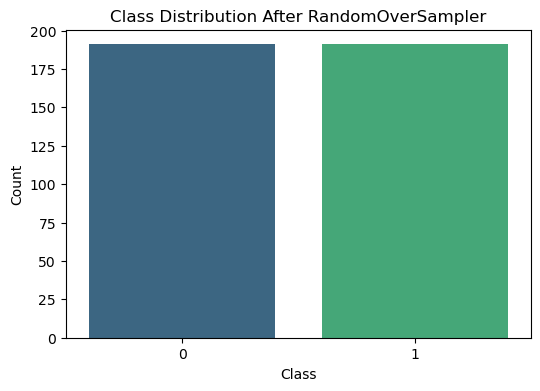

In [14]:
# Plot class distribution after resampling
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Class Distribution After RandomOverSampler')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [22]:
missing = X_resampled.isnull().sum()
print(missing[missing > 0])

Feature_1712    132
Feature_1713    132
Feature_1714    132
Feature_1715    132
Feature_1716    132
Feature_1717    132
Feature_1718    132
Feature_1719    132
Feature_1720    132
Feature_1721    132
Feature_1722    132
Feature_1723    132
Feature_1724    132
Feature_1725    132
Feature_1726    132
Feature_1727    132
Feature_1728    132
Feature_1729    132
Feature_1730    132
Feature_1731    132
Feature_1732    132
Feature_1733    132
Feature_1734    132
dtype: int64


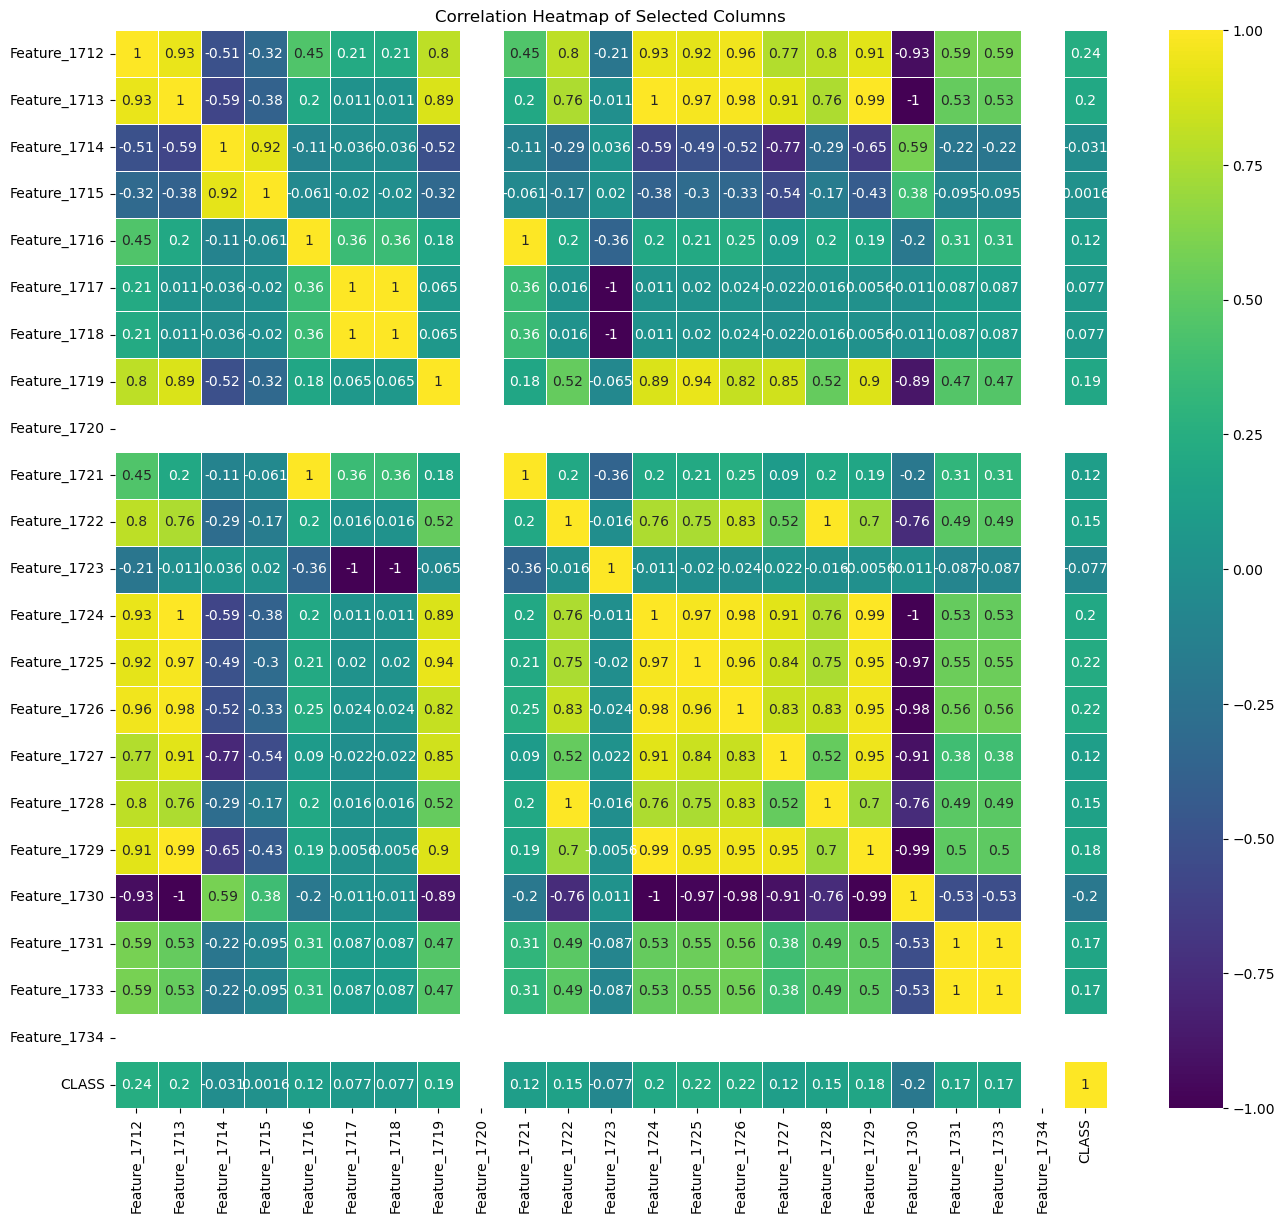

In [28]:
missin_cols=['Feature_1712',
    'Feature_1713','Feature_1714','Feature_1715','Feature_1716','Feature_1717','Feature_1718','Feature_1719','Feature_1720','Feature_1721','Feature_1722',
    'Feature_1723','Feature_1724','Feature_1725','Feature_1726','Feature_1727','Feature_1728','Feature_1729','Feature_1730','Feature_1731',
    'Feature_1733','Feature_1734','CLASS']
# Compute correlation matrix for selected columns
corr_matrix = train[missin_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Columns")
plt.show()

In [26]:
missing_s = sub.isnull().sum()
print(missing_s[missing_s > 0])

Feature_1712    12
Feature_1713    12
Feature_1714    12
Feature_1715    12
Feature_1716    12
Feature_1717    12
Feature_1718    12
Feature_1719    12
Feature_1720    12
Feature_1721    12
Feature_1722    12
Feature_1723    12
Feature_1724    12
Feature_1725    12
Feature_1726    12
Feature_1727    12
Feature_1728    12
Feature_1729    12
Feature_1730    12
Feature_1731    12
Feature_1732    12
Feature_1733    12
Feature_1734    12
dtype: int64


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
selec_missin_drop=['Feature_1714','Feature_1715','Feature_1716','Feature_1717','Feature_1718','Feature_1721','Feature_1723',
                   'Feature_1727']
missing_high_corr_coln=['Feature_1712','Feature_1713','Feature_1719','Feature_1722','Feature_1724','Feature_1725','Feature_1726',
'Feature_1728','Feature_1729','Feature_1730','Feature_1731','Feature_1733']

train_1=X_resampled.drop(columns=selec_missin_drop)
X_train_1=X_train.drop(columns=selec_missin_drop)

test_1=X_test.drop(columns=selec_missin_drop)
sub_1=X_sub.drop(columns=selec_missin_drop)
for col in missing_high_corr_coln:
    train_1[col].fillna(train_1[col].median(), inplace=True)

for col in missing_high_corr_coln:
    test_1[col].fillna(test_1[col].median(), inplace=True)

for col in missing_high_corr_coln:
    sub_1[col].fillna(sub_1[col].median(), inplace=True)

for col in missing_high_corr_coln:
    X_train[col].fillna(X_train[col].median(), inplace=True)

# remove columns with constant values
# train_1=train_1.loc[:, train_1.nunique() != 1]
# test_1=test_1.loc[:, test_1.nunique() != 1]


/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_21974/1915970478.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_1[col].fillna(train_1[col].median(), inplace=True)
/var/folders/kb/f1k4_th17h992yvkrm2v50d40000gn/T/ipykernel_21974/1915970478.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [28]:
#print(np.isinf(train_1).any().any())
import numpy as np

# Example: Create a boolean DataFrame where True = inf or -inf
inf_mask = np.isinf(train_1)
inf_mask_test = np.isinf(test_1)

#print(inf_mask)
# Get the values that are inf or -inf
# inf_values = train_1[inf_mask]
# print(inf_values)
# Get positions of inf/-inf values
inf_positions = [(row_idx, col) for row_idx, row in inf_mask.iterrows() for col in train_1.columns if row[col]]
inf_positions_test = [(row_idx, col) for row_idx, row in inf_mask_test.iterrows() for col in test_1.columns if row[col]]


train_1.replace([np.inf, -np.inf], np.nan, inplace=True)
train_1.fillna(train_1.median(), inplace=True)
X_train_1.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train_1.fillna(sub_1.median(), inplace=True)
test_1.replace([np.inf, -np.inf], np.nan, inplace=True)
test_1.fillna(test_1.median(), inplace=True)
sub_1.replace([np.inf, -np.inf], np.nan, inplace=True)
sub_1.fillna(sub_1.median(), inplace=True)


In [30]:
categorical_threshold = 20
def cat_num(df):
    unique_counts = df.nunique()
    # Identify categorical columns
    categorical_cols = unique_counts[unique_counts <= categorical_threshold].index.tolist()
    
    # Identify numerical/continuous columns
    # These are the columns where the unique count is GREATER than the threshold.
    numerical_cols = unique_counts[unique_counts > categorical_threshold].index.tolist()
    
    #len(categorical_cols),len(numerical_cols)
    df_num = df[numerical_cols]
    df_cat = df[categorical_cols]
    return df_num,df_cat

train_1_num,train_1_cat=cat_num(train_1)
train_1_num_org,train_1_cat_org=cat_num(X_train_1)
test_1_num,test_1_cat=cat_num(test_1)
sub_1_num,sub_1_cat=cat_num(sub_1)

def cap_outliers(df):
    df_capped = df.copy()  # Avoid modifying original data
    
    # Iterate over numeric columns
    for col in df_capped:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    
    return df_capped

# Apply to your DataFrame
train_1_capped = cap_outliers(train_1_num)
test_1_capped = cap_outliers(test_1_num)
sub_1_capped = cap_outliers(sub_1_num)
train_1_org = cap_outliers(train_1_num_org)


# Check capped data
# print(train_1_capped.describe())


# If you want to recombine:
train_1_capped = pd.concat([train_1_capped, train_1_cat], axis=1)
test_1_capped = pd.concat([test_1_capped, test_1_cat], axis=1)
sub_1_capped = pd.concat([sub_1_capped, sub_1_cat], axis=1)
train_1_org_capped = pd.concat([train_1_org, train_1_cat_org], axis=1)

# Check results
#print(train_1_capped.head())

In [48]:
train_1_capped

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_2981,Feature_2982,Feature_3097,Feature_3098,Feature_3104,Feature_3107,Feature_3225,Feature_3226,Feature_3232,Feature_3235
0,18281.541667,18432.0,9409.650391,0.514708,0.011300,0.045369,2.803803,0.356658,1.803803,90.183916,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,20010.083333,20100.0,8303.049072,0.417707,0.014959,0.080294,2.338398,0.429532,1.338398,31.291507,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,27260.125000,27437.0,12189.649414,0.447160,0.011428,0.046402,2.782842,0.359345,1.782842,11.965643,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,41938.125000,42138.0,17866.433594,0.426019,0.009908,0.034878,3.060655,0.326727,2.060655,8.966286,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,41274.125000,41439.0,14315.041992,0.346828,0.013596,0.065680,2.478506,0.403469,1.478506,34.898671,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,53946.875000,54108.0,16616.732422,0.308020,0.014209,0.071738,2.406674,0.415511,1.406674,13.631490,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
378,14532.104167,14598.0,5687.149902,0.390436,0.019549,0.122272,1.971632,0.514219,0.971632,16.878011,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
379,57189.916667,57399.0,19331.050781,0.338015,0.012005,0.051206,2.692930,0.371343,1.692930,38.911738,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
380,10177.791667,10252.5,4870.126953,0.479495,0.017320,0.108345,2.128789,0.473251,1.128789,7.481164,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [54]:
# Remove features with correlation > 0.95
corr_matrix = train_1_capped.corr().abs()
corr_matrix_test = test_1_capped.corr().abs()
corr_matrix_sub = sub_1_capped.corr().abs()
#corr_matrix_org = train_1_org_capped.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper_test = corr_matrix_test.where(np.triu(np.ones(corr_matrix_test.shape), k=1).astype(bool))
upper_sub = corr_matrix_test.where(np.triu(np.ones(corr_matrix_org.shape), k=1).astype(bool))
#upper_org = corr_matrix_org.where(np.triu(np.ones(corr_matrix_test.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > .98)]
to_drop_test = [column for column in upper_test.columns if any(upper_test[column] > .98)]
to_drop_sub = [column for column in upper_sub.columns if any(upper_sub[column] > .98)]
to_drop_org = [column for column in upper.columns if any(upper[column] > .98)]
#df.drop(columns=to_drop, inplace=True)
train_exp=train_1_capped.drop(columns=to_drop)
test_exp=test_1_capped.drop(columns=to_drop_test)
sub_exp=sub_1_capped.drop(columns=to_drop_sub)
train_exp_org=train_1_org_capped.drop(columns=to_drop_org)


In [60]:
train_exp

,Feature_1,Feature_3,Feature_4,Feature_5,Feature_10,Feature_11,Feature_13,Feature_14,Feature_15,Feature_16,...,Feature_2981,Feature_2982,Feature_3097,Feature_3098,Feature_3104,Feature_3107,Feature_3225,Feature_3226,Feature_3232,Feature_3235
0,18281.541667,9409.650391,0.514708,0.011300,90.183916,179.125654,44.140704,18.149861,0.216274,0.088928,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,20010.083333,8303.049072,0.417707,0.014959,31.291507,122.447882,27.150254,14.165947,0.207880,0.108412,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,27260.125000,12189.649414,0.447160,0.011428,11.965643,241.904940,47.572298,22.613842,0.161702,0.076866,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,41938.125000,17866.433594,0.426019,0.009908,8.966286,226.260911,34.835854,29.188142,0.135663,0.113669,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,41274.125000,14315.041992,0.346828,0.013596,34.898671,208.619270,45.788460,20.180269,0.175847,0.077501,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,53946.875000,16616.732422,0.308020,0.014209,13.631490,248.638291,38.624839,22.149133,0.133424,0.076511,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
378,14532.104167,5687.149902,0.390436,0.019549,16.878011,81.971448,23.210878,16.230214,0.300243,0.173830,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
379,57189.916667,19331.050781,0.338015,0.012005,38.911738,265.215007,38.919676,25.609045,0.125026,0.082266,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
380,10177.791667,4870.126953,0.479495,0.017320,7.481164,92.147328,22.055168,12.897927,0.225824,0.132362,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [62]:
common_columns = train_exp.columns.intersection(test_exp.columns)
X_train_aligned = train_exp[common_columns]
X_test_aligned = test_exp[common_columns]
X_sub_aligned=sub_exp[common_columns]
X_org_aligned=train_exp_org[common_columns]

print(X_train_aligned.shape)
print(X_test_aligned.shape)
print(X_sub_aligned.shape)
print(X_org_aligned.shape)

(382, 1212)
(100, 1212)
(36, 1212)
(315, 1212)


In [40]:
missing_cols = set(common_columns) - set(train_exp_org.columns)
print("Missing columns in train_exp_org:", missing_cols)


Missing columns in train_exp_org: {'Feature_1166', 'Feature_1208', 'Feature_1039', 'Feature_2446', 'Feature_2163'}


In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix
# Scale features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_aligned)
X_test_scaled = scaler.transform(X_test_aligned)
X_sub_scaled=scaler.fit_transform(X_sub_aligned)
X_org_scaled=scaler.fit_transform(X_org_aligned)

def predictions(model,X_test,y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probability for positive class
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred)  # Sensitivity / TPR
    
    # Confusion matrix to calculate specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUROC: {auroc:.4f}")
    print(f"Sensitivity (Recall / TPR): {recall:.4f}")
    print(f"Specificity (TNR): {specificity:.4f}")
    print(f"F1-score: {f1:.4f}")


In [70]:

from sklearn.model_selection import GridSearchCV

# Set up parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' if using 'liblinear' or 'saga'
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 500]
}

# Logistic Regression model
logreg = LogisticRegression()

# Grid Search
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # or 'roc_auc' for AUC
    n_jobs=-1
)

# Fit on train data
grid_search.fit(X_train_scaled, y_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_logreg = grid_search.best_estimator_


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.7311918460117905


In [72]:
# Predictions
print('Training Set')
predictions(best_logreg,X_train_scaled,y_resampled)
print('Testing Set')
predictions(best_logreg,X_test_scaled,y_test)

Training Set
Accuracy: 0.9607
AUROC: 0.9956
Sensitivity (Recall / TPR): 0.9581
Specificity (TNR): 0.9634
F1-score: 0.9606
Testing Set
Accuracy: 0.6300
AUROC: 0.6560
Sensitivity (Recall / TPR): 0.5714
Specificity (TNR): 0.6724
F1-score: 0.5647


In [78]:
import joblib

# Save model
joblib.dump(best_logreg, 'models/best_logreg.pkl')


['models/best_logreg.pkl']

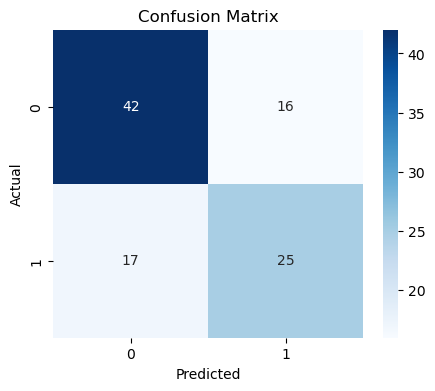

In [100]:
cm = confusion_matrix(y_test, y_pred)
# Plot using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [74]:
import pandas as pd

# Predict probabilities
# (assuming binary classification: columns for class 0 and 1)
probs_train = best_logreg.predict_proba(X_org_scaled)
probs_test = best_logreg.predict_proba(X_test_scaled)
probs_sub = best_logreg.predict_proba(X_sub_scaled)

# Create a DataFrame for submission
df_submission_train = pd.DataFrame(probs_train, columns=['prob_class_0', 'prob_class_1'])
df_submission_test = pd.DataFrame(probs_test, columns=['prob_class_0', 'prob_class_1'])
df_submission_sub = pd.DataFrame(probs_sub, columns=['prob_class_0', 'prob_class_1'])

# Add ID column

df_submission_train['ID'] = train['ID'].values

df_submission_test['ID'] = test['ID'].values
df_submission_sub['ID'] = sub['ID'].values

# Move 'ID' to first column
df_submission_train = df_submission_train[['ID', 'prob_class_0', 'prob_class_1']]
df_submission_test = df_submission_test[['ID', 'prob_class_0', 'prob_class_1']]
df_submission_sub = df_submission_sub[['ID', 'prob_class_0', 'prob_class_1']]



# Save to CSV
df_submission_train.to_csv('train_pred.csv', index=False)
df_submission_test.to_csv('test_pred.csv', index=False)
df_submission_sub.to_csv('submission_pred.csv', index=False)

print("Submission file created: submission.csv")


Submission file created: submission.csv
